# Proyek Analisis Data: Bike Sharing
- Nama: Nina Ayuningtyas
- Email: elizabethayuningtyas@gmail.com
- Id Dicoding: geninaa

## Latar Belakang

Dataset ini berisi data jumlah sepeda sewa harian dan per jam antara tahun 2011 dan 2012 dalam sistem berbagi sepeda di ibu kota beserta informasi cuaca dan musiman yang sesuai.

Sumber dataset: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?select=day.csv

Keterangan kolom:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

- Hari apa yang menjadi favorit penyewa per tahun nya?
- Bagaimana perbandingan total penyewa di setiap season per tahun nya?
- Bagaimana perkembangan tren peminjaman sepeda per bulan nya dalam kurun waktu satu tahun?
- Bagaimana Tren Sewa Sepeda Berdasarkan Tipe Penyewa (Casual vs Registered) Per Tahun?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# import dataset ke dataframe
day = pd.read_csv('Bike/day.csv')
hour = pd.read_csv('Bike/hour.csv')

In [3]:
# menampilkan preview 5 data teratas dari df1
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# menampilkan preview 5 data teratas df2 
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
# mengecek apakah ada missing value
print("Missing Value pada DataFrame Day:\n",day.isnull().sum())
print("\n")
print("Missing Value pada DataFrame Hour:\n",hour.isnull().sum())

Missing Value pada DataFrame Day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Missing Value pada DataFrame Hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# mengecek info kolom dari DataFrame 'day'
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# menampilkan deskripsi statistik dari DataFrame 'day'
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# mengecek info kolom dari DataFrame 'hour'
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# menampilkan deskripsi statistik dari DataFrame 'hour'
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Beberapa hal yang akan dibersihkan:
- Mengubah data type 'dteday' ke format datetime
- Categorical decoding pada kolom season, year, month, weekday, workingday

### Cleaning Data

#### A. Mengubah tipe data pada kolom dteday

In [10]:
# convert datatype 'dteday' ke datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [11]:
# cek apakah kolom dteday dari dua dataframe sudah berubah
day.info()
print("\n")
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### B. LABEL DECODING

#### 1. Season

In [12]:
# Mengubah season dengan keterangan (1:springer, 2:summer, 3:fall, 4:winter)
replace_mapping = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}

day['season'] = day['season'].replace(replace_mapping)
hour['season'] = hour['season'].replace(replace_mapping)

#### 2. Year

In [13]:
# yr : year (0: 2011, 1:2012)
day['yr'] = day['yr'].replace({0:'2011',1:'2012'})
hour['yr'] = hour['yr'].replace({0:'2011',1:'2012'})

#### 3. Month

In [70]:
# mnth : month ( 1 to 12)
months = {1:'Januari',2:'Februari',3:'Maret',4:'April',
          5:'Mei',6:'Juni',7:'Juli',8:'Agustus',
          9:'September',10:'Oktober',11:'November',12:'December'}

day['mnth'] = day['mnth'].replace(months)
hour['mnth'] = hour['mnth'].replace(months)

#### 4. weekday

In [71]:
days = {0:'Minggu',1:'Senin',2:'Selasa',
        3:'Rabu',4:'Kamis',5:'Jumat',6:'Sabtu'}

day['weekday'] = day['weekday'].replace(days)
hour['weekday'] = hour['weekday'].replace(days)

#### 5. workingday

In [16]:
day['workingday'] = day['workingday'].replace({0:'No',1:'Yes'})
hour['workingday'] = hour['workingday'].replace({0:'No',1:'Yes'})

#### C. Final Check pada Masing-Masing DataFrame

In [17]:
print("Nilai Unik dari Kolom 'season':", day['season'].unique())
print("Nilai Unik dari Kolom 'yr':",day['yr'].unique())
print("Nilai Unik dari Kolom 'mnth':", day['mnth'].unique())
print("Nilai Unik dari Kolom 'weekday':", day['weekday'].unique())
print("Nilai Unik dari Kolom 'workingday':", day['workingday'].unique())

Nilai Unik dari Kolom 'season': ['springer' 'summer' 'fall' 'winter']
Nilai Unik dari Kolom 'yr': ['2011' '2012']
Nilai Unik dari Kolom 'mnth': ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Nilai Unik dari Kolom 'weekday': ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Nilai Unik dari Kolom 'workingday': ['No' 'Yes']


In [18]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
print("Nilai Unik dari Kolom 'season':", hour['season'].unique())
print("Nilai Unik dari Kolom 'yr':",hour['yr'].unique())
print("Nilai Unik dari Kolom 'mnth':", hour['mnth'].unique())
print("Nilai Unik dari Kolom 'weekday':", hour['weekday'].unique())
print("Nilai Unik dari Kolom 'workingday':", hour['workingday'].unique())

Nilai Unik dari Kolom 'season': ['springer' 'summer' 'fall' 'winter']
Nilai Unik dari Kolom 'yr': ['2011' '2012']
Nilai Unik dari Kolom 'mnth': ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Nilai Unik dari Kolom 'weekday': ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Nilai Unik dari Kolom 'workingday': ['No' 'Yes']


In [20]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,0,Saturday,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,springer,2011,January,1,0,Saturday,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,springer,2011,January,2,0,Saturday,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,springer,2011,January,3,0,Saturday,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,springer,2011,January,4,0,Saturday,No,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,December,19,0,Monday,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,December,20,0,Monday,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,December,21,0,Monday,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,December,22,0,Monday,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61


In [21]:
#day.to_csv('day.csv',index=False)

In [22]:
#hour.to_csv('hour.csv',index=False)

## Exploratory Data Analysis (EDA)

#### A. Korelasi Setiap Feature pada DataFrame "day"

<AxesSubplot:>

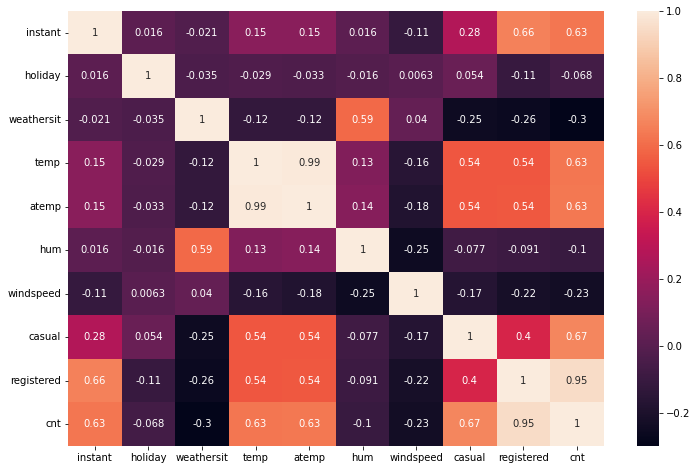

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(day.corr(),annot=True)

#### B. Korelasi Setiap Feature pada DataFrame "hour"

<AxesSubplot:>

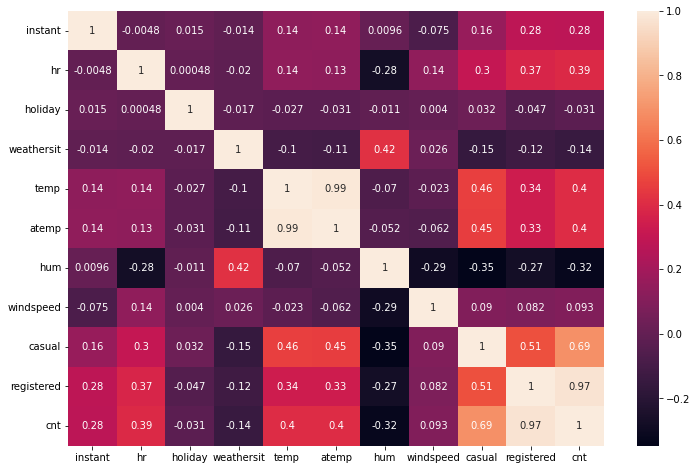

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hour.corr(),annot=True)

#### C. Jumlah Penyewa Sepeda Per Bulan

In [25]:
day.groupby(['yr','mnth']).cnt.count()

yr    mnth     
2011  April        30
      August       31
      December     31
      February     28
      January      31
      July         31
      June         30
      March        31
      May          31
      November     30
      October      31
      September    30
2012  April        30
      August       31
      December     31
      February     29
      January      31
      July         31
      June         30
      March        31
      May          31
      November     30
      October      31
      September    30
Name: cnt, dtype: int64

#### D. Perbandingan Jumlah Penyewa Casual dan Registered

In [26]:
day.groupby(['yr','mnth'])['casual','registered'].sum()

C:\Users\User\AppData\Local\Temp\ipykernel_20672\2941935697.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day.groupby(['yr','mnth'])['casual','registered'].sum()


casual  registered
yr   mnth                         
2011 April       22346       72524
     August      28842      107849
     December     8448       78875
     February     6242       41973
     January      3073       35116
     July        36452      104889
     June        30612      112900
     March       12826       51219
     May         31050      104771
     November    15594       86573
     October     25222       98289
     September   26545      100873
2012 April       38456      135768
     August      43197      171306
     December    13245      110468
     February     8721       94416
     January      8969       87775
     July        41705      161902
     June        43294      159536
     March       31618      133257
     May         44235      151630
     November    21009      131655
     October     34538      164303
     September   43778      174795

#### E. Jumlah Penyewa Casual dan Registered Berdasarkan Hari

In [73]:
day.groupby(['yr','weekday']).agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})

casual  registered     cnt
yr   weekday                              
2011 Friday      29453      152553  182006
     Monday      31560      148661  180221
     Saturday    59547      120196  179743
     Sunday      59603      117471  177074
     Thursday    22440      152112  174552
     Tuesday     23989      156349  180338
     Wednesday   20660      148509  169169
2012 Friday      48785      256999  305784
     Monday      39224      236058  275282
     Saturday    94305      203759  298064
     Sunday      80918      186035  266953
     Thursday    39020      271823  310843
     Tuesday     33854      254917  288771
     Wednesday   36659      267220  303879

## Visualization & Explanatory Analysis

### Pertanyaan 1: Hari apa yang menjadi favorit penyewa per tahun nya?

Text(0, 0.5, 'Jumlah')

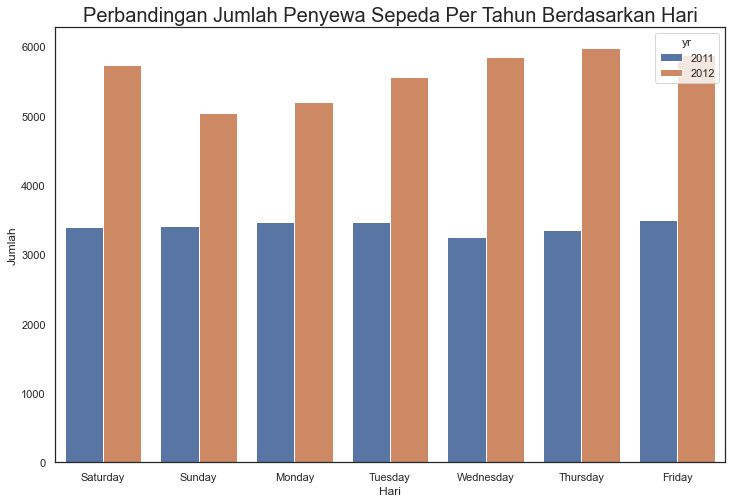

In [72]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x="weekday", y="cnt", hue="yr", data=day, ci=None)

plt.title("Perbandingan Jumlah Penyewa Sepeda Per Tahun Berdasarkan Hari", fontsize=20)
plt.xlabel("Hari",fontsize =12)
plt.ylabel("Jumlah",fontsize =12)

### Pertanyaan 2: Bagaimana perbandingan total penyewa di setiap season per tahun nya?

Text(0, 0.5, 'Jumlah')

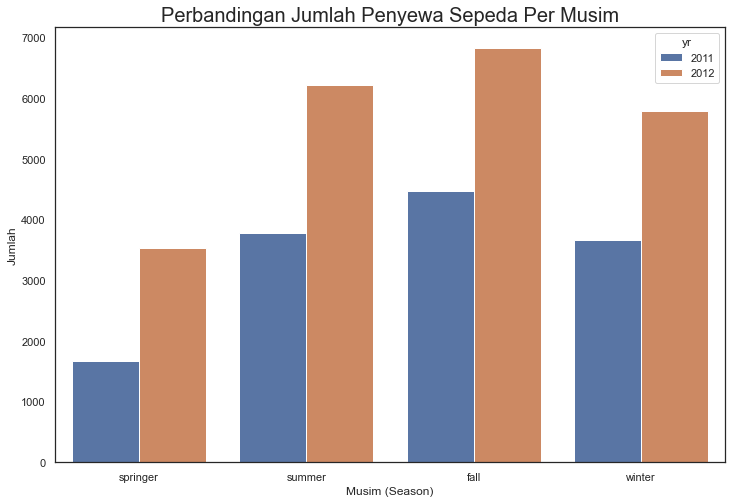

In [66]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x="season", y="cnt", hue="yr", data=day, ci=None)

plt.title("Perbandingan Jumlah Penyewa Sepeda Per Musim",fontsize = 20)
plt.xlabel("Musim (Season)",fontsize =12)
plt.ylabel("Jumlah",fontsize =12)

### Pertanyaan 3: Bagaimana perkembangan tren peminjaman sepeda per bulan nya dalam kurun waktu satu tahun?

In [30]:
day_copy = day.copy()

#day_copy['month'] = day_copy['dteday'].dt.month

In [31]:
day_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
# resampling dataframe untuk visualisasi line
df = day_copy.resample('M',on='dteday').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
}).reset_index()

In [33]:
df

,dteday,casual,registered,cnt
0,2011-01-31,3073,35116,38189
1,2011-02-28,6242,41973,48215
2,2011-03-31,12826,51219,64045
3,2011-04-30,22346,72524,94870
4,2011-05-31,31050,104771,135821
5,2011-06-30,30612,112900,143512
6,2011-07-31,36452,104889,141341
7,2011-08-31,28842,107849,136691
8,2011-09-30,26545,100873,127418
9,2011-10-31,25222,98289,123511


In [34]:
df['year'] = df.dteday.dt.year
df['month'] = df.dteday.dt.month

In [35]:
df

,dteday,casual,registered,cnt,year,month
0,2011-01-31,3073,35116,38189,2011,1
1,2011-02-28,6242,41973,48215,2011,2
2,2011-03-31,12826,51219,64045,2011,3
3,2011-04-30,22346,72524,94870,2011,4
4,2011-05-31,31050,104771,135821,2011,5
5,2011-06-30,30612,112900,143512,2011,6
6,2011-07-31,36452,104889,141341,2011,7
7,2011-08-31,28842,107849,136691,2011,8
8,2011-09-30,26545,100873,127418,2011,9
9,2011-10-31,25222,98289,123511,2011,10


In [52]:
#memisahkan dataframe berdasarkan tahun

df_11 = df[df['year'] == 2011]
df_12 = df[df['year'] == 2012]

In [40]:
df_11

,dteday,casual,registered,cnt,year,month
0,2011-01-31,3073,35116,38189,2011,1
1,2011-02-28,6242,41973,48215,2011,2
2,2011-03-31,12826,51219,64045,2011,3
3,2011-04-30,22346,72524,94870,2011,4
4,2011-05-31,31050,104771,135821,2011,5
5,2011-06-30,30612,112900,143512,2011,6
6,2011-07-31,36452,104889,141341,2011,7
7,2011-08-31,28842,107849,136691,2011,8
8,2011-09-30,26545,100873,127418,2011,9
9,2011-10-31,25222,98289,123511,2011,10


In [43]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12 non-null     datetime64[ns]
 1   casual      12 non-null     int64         
 2   registered  12 non-null     int64         
 3   cnt         12 non-null     int64         
 4   year        12 non-null     int64         
 5   month       12 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 672.0 bytes


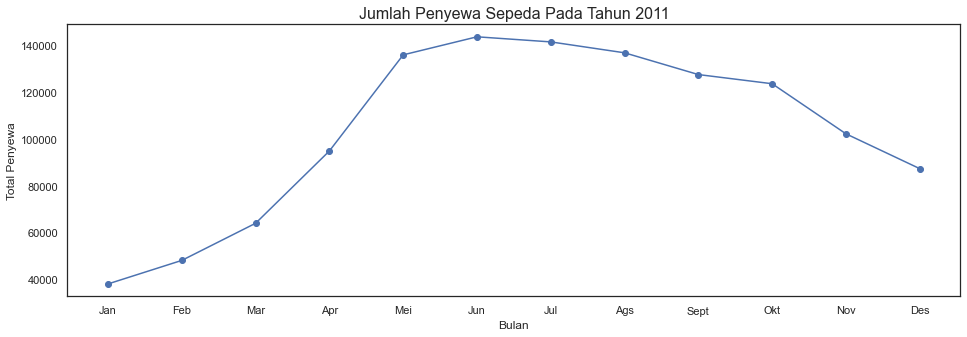

In [62]:
# chart

# definisi dict untuk mengganti nama bulan
nama_bulan = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "Mei",
    6 : "Jun",
    7 : "Jul",
    8 : "Ags",
    9 : "Sept",
    10 : "Okt",
    11 : "Nov",
    12 : "Des"
}

#plot
x = df_11['month']
y = df_11['cnt']

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(x, y, marker="o")

# custom xlabel 
ax.set_xticks(x)
ax.set_xticklabels([nama_bulan[month] for month in x])

plt.title("Jumlah Penyewa Sepeda Pada Tahun 2011",fontsize = 16)
plt.xlabel("Bulan",fontsize = 12)
plt.ylabel("Total Penyewa",fontsize = 12)
plt.show()

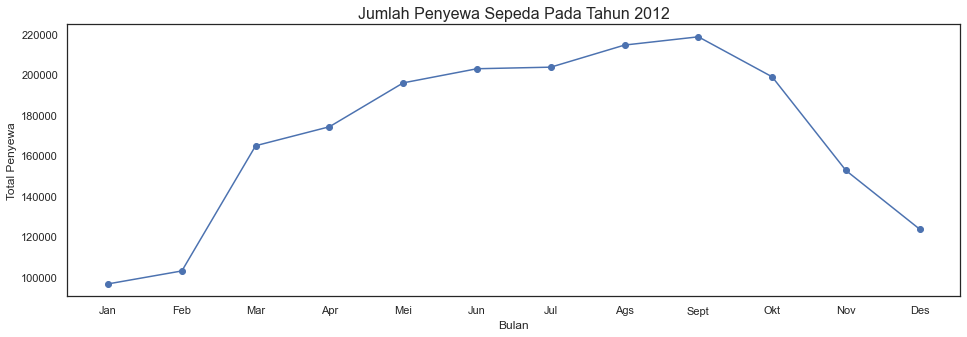

In [61]:
# chart tren total penyewa tahun 2012

# definisi dict untuk mengganti nama bulan

#plot
x = df_12['month']
y = df_12['cnt']

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(x, y, marker="o")

# custom xlabel 
ax.set_xticks(x)
ax.set_xticklabels([nama_bulan[month] for month in x])

plt.title("Jumlah Penyewa Sepeda Pada Tahun 2012",fontsize = 16)
plt.xlabel("Bulan", fontsize = 12)
plt.ylabel("Total Penyewa", fontsize = 12)
plt.show()

### Pertanyaan 4: Bagaimana Tren Sewa Sepeda Berdasarkan Tipe Penyewa Per Tahun?

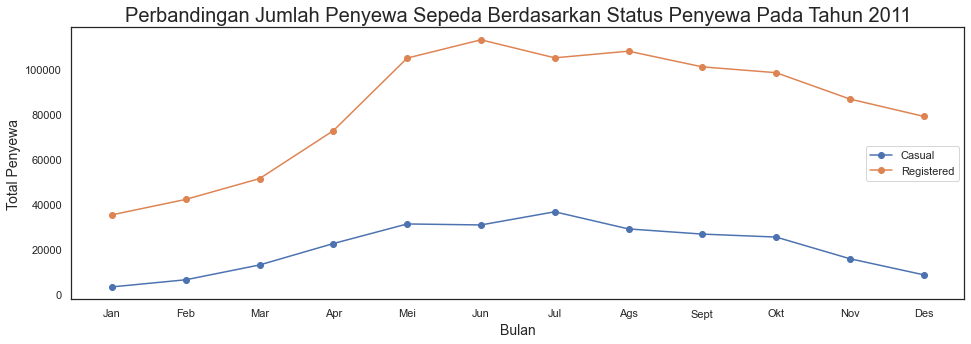

In [58]:
# chart perbandingan jumlah penyewa casual vs registered tahun 2011

# definisi dict untuk mengganti nama bulan
nama_bulan = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "Mei",
    6 : "Jun",
    7 : "Jul",
    8 : "Ags",
    9 : "Sept",
    10 : "Okt",
    11 : "Nov",
    12 : "Des"
}

#plot
x = df_11['month']
y = df_11['casual']
y2 = df_11['registered']

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(x, y, label="Casual", marker="o")
plt.plot(x, y2, label="Registered", marker="o")

# custom xlabel 
ax.set_xticks(x)
ax.set_xticklabels([nama_bulan[month] for month in x])

plt.title("Perbandingan Jumlah Penyewa Sepeda Berdasarkan Status Penyewa Pada Tahun 2011",fontsize=20)
plt.xlabel("Bulan",fontsize=14)
plt.ylabel("Total Penyewa",fontsize=14)
plt.legend(loc="right")
plt.show()

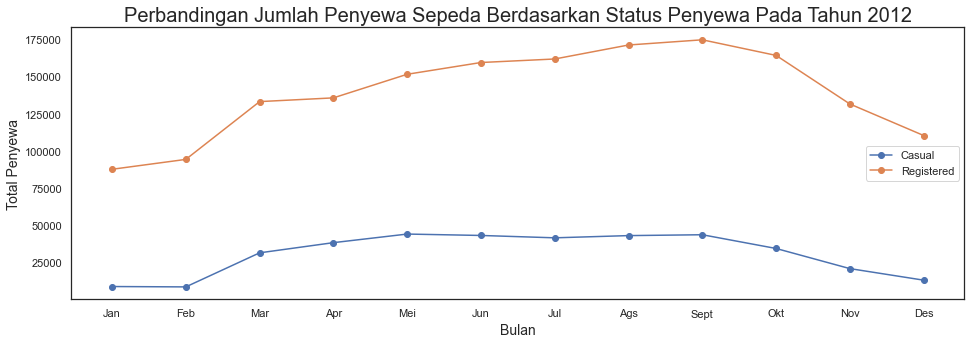

In [60]:
# chart perbandingan jumlah penyewa casual vs registered tahun 2012

# definisi dict untuk mengganti nama bulan
nama_bulan = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "Mei",
    6 : "Jun",
    7 : "Jul",
    8 : "Ags",
    9 : "Sept",
    10 : "Okt",
    11 : "Nov",
    12 : "Des"
}

#plot
x = df_12['month']
y = df_12['casual']
y2 = df_12['registered']

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(x, y, label="Casual", marker="o")
plt.plot(x, y2, label="Registered", marker="o")

# custom xlabel 
ax.set_xticks(x)
ax.set_xticklabels([nama_bulan[month] for month in x])

plt.title("Perbandingan Jumlah Penyewa Sepeda Berdasarkan Status Penyewa Pada Tahun 2012",fontsize=20)
plt.xlabel("Bulan",fontsize=14)
plt.ylabel("Total Penyewa",fontsize=14)
plt.legend(loc="right")
plt.show()

## Conclusion

#### Pertanyaan 1: Hari apa yang menjadi favorit penyewa per tahun nya?

Berdasarkan hasil visualisasi, jumlah penyewa pada tahun 2011 tidak jauh berbeda antar hari. Namun bisa disimpulkan jika hari Senin, Selasa, dan Rabu menjadi hari dengan jumlah penyewa terbanyak dibandingkan hari lainnya. Sedangkan pada tahun 2012, terjadi lonjakan jumlah penyewa dibanding tahun 2011. Hari Kamis menjadi hari dengan jumlah penyewa sepeda terbanyak pada tahun 2012 dibanding hari lain nya.

#### Pertanyaan 2: Bagaimana perbandingan total penyewa di setiap season per tahun nya?

Berdasarkan hasil visualisasi, musim gugur (fall) baik pada tahun 2011 dan 2012 merupakan musim dengan jumlah penyewa sepeda terbanyak. Sementara musim springer baik pada tahun 2011 dan 2012 merupakan musim dengan jumlah penyewa sepeda terendah.

#### Pertanyaan 3: Bagaimana perkembangan tren peminjaman sepeda per bulan nya dalam kurun waktu satu tahun?

Dari hasil visualisasi line chart, tahun 2011 memiliki tren penyewa yaitu sebagai berikut.
- Terjadi kenaikan jumlah penyewa secara signifikan pada 6 bulan pertama (Januari - Juni) dan mencapai puncak jumlah penyewa terbanyak yaitu pada bulan Juni
- Setelah bulan Juni, terjadi penurunan jumlah penyewa. Penurunan jumlah paling drastis yaitu pada bulan Oktober - November

Kemudian untuk tren peminjaman pada tahun 2012 yaitu sebagai berikut.
- Pada bulan Februari - Maret terjadi peningkatan jumlah penyewa secara drastis, dengan puncak jumlah penyewa terbanyak yaitu pada bulan September
- Terjadi penurunan jumlah setelah bulan September sama seperti yang terjadi pada tahun 2011 yaitu pada bulan Oktober - November terjadi penurunan jumlah penyewa secara drastis

#### Pertanyaan 4: Bagaimana Tren Sewa Sepeda Berdasarkan Tipe Penyewa (Casual vs Registered) Per Tahun?

Pada chart sebelumnya, dapat disimpulkan bahwa jumlah penyewa dengan status registered lebih banyak dibanding penyewa dengan status casual baik pada tahun 2011 maupun 2012. Untuk penjelasan lebih yaitu sebagai berikut.
- Pada tahun 2011, jumlah penyewa casual tingkat fluktuasi nya lebih stabil dibandingkan pada penyewa registered (kenaikan maupun penurunan jumlah tidak drastis). Begitu juga dengan trend chart pada tahun 2012
- Pada tahun 2011, jumlah penyewa registered mengalami pertambahan jumlah drastis dibandingkan jumlah penyewa registered pada tahun 2012